# Acquire and summarize

## Question 1

Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [39]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from env import host, user, password

In [40]:
#URL function
def get_db_url(host, user, password, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [41]:
#Declare the database and url
database = 'zillow'

url = get_db_url(host, user, password, database)

In [42]:
#Create the SQL query
query = '''
        SELECT prop.*,
        predictions_2017.logerror,
        predictions_2017.transactiondate,
        air.airconditioningdesc,
        arch.architecturalstyledesc,
        build.buildingclassdesc,
        heat.heatingorsystemdesc,
        land.propertylandusedesc,
        story.storydesc,
        type.typeconstructiondesc
        FROM properties_2017 prop
        JOIN (
            SELECT parcelid, MAX(transactiondate) AS max_transactiondate
            FROM predictions_2017
            GROUP BY parcelid
            ) pred USING(parcelid)
        JOIN predictions_2017 ON pred.parcelid = predictions_2017.parcelid
                          AND pred.max_transactiondate = predictions_2017.transactiondate
        LEFT JOIN airconditioningtype air USING(airconditioningtypeid)
        LEFT JOIN architecturalstyletype arch USING(architecturalstyletypeid)
        LEFT JOIN buildingclasstype build USING(buildingclasstypeid)
        LEFT JOIN heatingorsystemtype heat USING(heatingorsystemtypeid)
        LEFT JOIN propertylandusetype land USING(propertylandusetypeid)
        LEFT JOIN storytype story USING(storytypeid)
        LEFT JOIN typeconstructiontype type USING(typeconstructiontypeid)
        WHERE propertylandusedesc = "Single Family Residential"
            AND transactiondate <= '2017-12-31'
            AND prop.longitude IS NOT NULL
            AND prop.latitude IS NOT NULL
        '''

In [43]:
#Read in the dataframe
df = pd.read_sql(query, url)

df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,None,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,None,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,None,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,None,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,None,9.0,3.0,...,6.037461e+13,-0.001011,2017-01-01,Central,None,None,Central,Single Family Residential,None,None


## Question 2

Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [44]:
#Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,52319.0,1.496888e+06,8.594310e+05,3.490000e+02,7.575810e+05,1.500095e+06,2.241248e+06,2.982270e+06
parcelid,52319.0,1.299682e+07,3.350951e+06,1.071186e+07,1.151017e+07,1.257825e+07,1.413036e+07,1.676878e+08
airconditioningtypeid,13615.0,2.439589e+00,3.847925e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,70.0,7.100000e+00,2.665670e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,47.0,6.789787e+02,7.118252e+02,3.800000e+01,2.635000e+02,5.120000e+02,8.095000e+02,3.560000e+03
bathroomcnt,52319.0,2.300015e+00,1.022816e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,52319.0,3.300770e+00,9.475632e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01
buildingqualitytypeid,33654.0,6.264961e+00,1.716328e+00,1.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
calculatedbathnbr,52184.0,2.305276e+00,1.018076e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
decktypeid,389.0,6.600000e+01,0.000000e+00,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01


In [8]:
#Info on the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52319 entries, 0 to 52318
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52319 non-null  int64  
 1   parcelid                      52319 non-null  int64  
 2   airconditioningtypeid         13615 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  47 non-null     float64
 5   bathroomcnt                   52319 non-null  float64
 6   bedroomcnt                    52319 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         33654 non-null  float64
 9   calculatedbathnbr             52184 non-null  float64
 10  decktypeid                    389 non-null    float64
 11  finishedfloor1squarefeet      4371 non-null   float64
 12  calculatedfinishedsquarefeet  52238 non-null  float64
 13  f

In [9]:
#Shape of the dataframe
df.shape

(52319, 68)

(-1.0, 1.0)

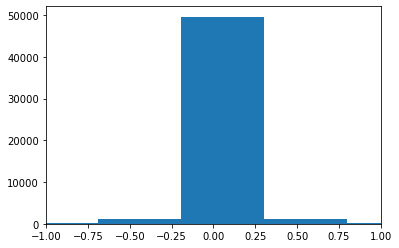

In [10]:
#Distribution of target variable
plt.hist(x=df['logerror'], bins=20)
plt.xlim(-1, 1)

In [11]:
#Value counts of the poolcnt column
df['poolcnt'].value_counts()

1.0    11077
Name: poolcnt, dtype: int64

## Question 3

Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [12]:
#Define function to calculate number and percent of values missing from each column
def null_counter(df):
    
    new_columns = ['name', 'num_rows_missing', 'pct_rows_missing']
    
    new_df = pd.DataFrame(columns=new_columns)
    
    for col in list(df.columns):
        num_missing = df[col].isna().sum()
        pct_missing = num_missing / df.shape[0]
        
        add_df = pd.DataFrame([{'name': col, 'num_rows_missing': num_missing,
                               'pct_rows_missing': pct_missing}])
        
        new_df = pd.concat([new_df, add_df], axis=0)
        
    new_df.set_index('name', inplace=True)
    
    return new_df

In [13]:
#Execute my function and verify the results
null_df = null_counter(df)

null_df.head()

,num_rows_missing,pct_rows_missing
name,,
id,0,0.0
parcelid,0,0.0
airconditioningtypeid,38704,0.739769
architecturalstyletypeid,52249,0.998662
basementsqft,52272,0.999102


In [14]:
#Check the shape to make sure I capture all columns
null_df.shape

(68, 2)

# Prepare

## Question 1

Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [15]:
#Maybe there are some houses with no square footage?
df[df['calculatedfinishedsquarefeet'] == 0]

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc


In [16]:
#What about nonexistent lots?
df[df['lotsizesquarefeet'] == 0]

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc


In [38]:
#Maybe ones that have no bedrooms?
df[df['bedroomcnt'] == 0]

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
124,2546776,14190895,0.0,0.0,NaN,NaN,NaN,6059.0,NaN,33879900.0,...,NaN,432623.0,830145.0,2016.0,397522.0,9354.84,6.059022e+13,-0.001296,2017-01-03,Single Family Residential
590,2062723,11662937,5.0,0.0,5.0,5782.0,5782.0,6037.0,5.0,34036757.0,...,2006.0,1471304.0,4626995.0,2016.0,3155691.0,55672.19,6.037263e+13,0.015158,2017-01-05,Single Family Residential
2602,496818,11696784,0.0,0.0,NaN,1378.0,1378.0,6037.0,NaN,33991632.0,...,NaN,41137.0,168828.0,2016.0,127691.0,2135.39,6.037235e+13,-0.124790,2017-06-16,Single Family Residential
2683,1602501,12227894,0.0,0.0,NaN,1208.0,1208.0,6037.0,NaN,33944448.0,...,1990.0,52011.0,185161.0,2016.0,133150.0,2558.37,6.037241e+13,-0.024661,2017-01-19,Single Family Residential
2887,856504,12146026,0.0,0.0,NaN,280.0,280.0,6037.0,NaN,34113439.0,...,1953.0,9137.0,963472.0,2016.0,954335.0,11016.31,6.037431e+13,-0.661313,2017-01-20,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51689,1341842,11784034,1.0,0.0,1.0,1150.0,1150.0,6037.0,1.0,34042800.0,...,1930.0,126400.0,158000.0,2016.0,31600.0,2712.37,6.037207e+13,0.025360,2017-09-14,Single Family Residential
52041,1759759,12399434,0.0,0.0,NaN,2307.0,2307.0,6037.0,NaN,33959173.0,...,1948.0,149000.0,499000.0,2016.0,350000.0,6315.67,6.037551e+13,0.509534,2017-09-18,Single Family Residential
52053,2004419,12000984,1.0,0.0,1.0,440.0,440.0,6037.0,1.0,34088163.0,...,1947.0,344770.0,1374602.0,2016.0,1029832.0,16591.34,6.037700e+13,-0.554524,2017-09-18,Single Family Residential
52266,342540,11784041,1.0,0.0,1.0,1020.0,1020.0,6037.0,1.0,34042800.0,...,1930.0,73000.0,104000.0,2016.0,31000.0,2708.57,6.037207e+13,0.009603,2017-09-19,Single Family Residential


## Question 2

Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

The input:

A dataframe

A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).

A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).

The output:

The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

In [17]:
#Define function to drop columns/rows based on proportion of nulls
def null_dropper(df, prop_required_column, prop_required_row):
    
    prop_null_column = 1 - prop_required_column
    
    for col in list(df.columns):
        
        null_sum = df[col].isna().sum()
        null_pct = null_sum / df.shape[0]
        
        if null_pct > prop_null_column:
            df.drop(columns=col, inplace=True)
            
    row_threshold = int(prop_required_row * df.shape[1])
    
    df.dropna(axis=0, thresh=row_threshold, inplace=True)
    
    return df

In [18]:
#Execute my function and visualize the results
clean_df = null_dropper(df, 0.75, 0.75)

clean_df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
4,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,...,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential


In [19]:
#Check shape of resulting dataframe
clean_df.shape

(52317, 29)

In [20]:
#Save a copy of the clean csv to my local machine
clean_df.to_csv('zillow.csv')

# Mall customers

## Question 1

Acquire data from the customers table in the mall_customers database.

In [21]:
#Define a query for the mall dataset
mall_query = '''
             SELECT *
             FROM customers
             '''

In [23]:
#Create the url to access the database
mall_database = 'mall_customers'

mall_url = get_db_url(host, user, password, mall_database)

In [24]:
#Read in the dataset
mall_df = pd.read_sql(mall_query, mall_url)

mall_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Question 2

Summarize the data (include distributions and descriptive statistics).

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

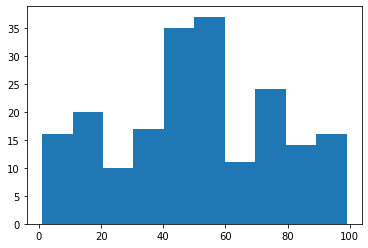

In [25]:
#Visualize distribution of target variable
plt.hist(mall_df['spending_score'])

In [26]:
#Descriptive statistics of numerical columns
mall_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [27]:
mall_df.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

## Question 3

Detect outliers using IQR.

In [28]:
#See the quantiles for age
mall_df['age'].quantile([0.25, 0.75])

0.25    28.75
0.75    49.00
Name: age, dtype: float64

In [29]:
#Store the quantiles in variables
age_q1, age_q3 = mall_df['age'].quantile([0.25, 0.75])

In [30]:
#Calculate the IQR
age_iqr = age_q3 - age_q1

age_iqr

20.25

In [31]:
#Calculate upper and lower bounds based on a k value of 1.5
age_upper = age_q3 + (age_iqr * 1.5)
age_lower = age_q1 - (age_iqr * 1.5)

age_upper, age_lower

(79.375, -1.625)

In [32]:
#Check for outliers in the age column
mall_df[mall_df['age'] > age_upper]

,customer_id,gender,age,annual_income,spending_score


## Question 4

Split data into train, validate, and test.

In [33]:
#Split my data into three subsets
seed = 42

mall_train, test_val = train_test_split(mall_df, train_size=0.7,
                                   random_state=seed)

mall_test, mall_val = train_test_split(test_val, train_size=0.5,
                                       random_state=seed)

mall_train.shape, mall_val.shape, mall_test.shape

((140, 5), (30, 5), (30, 5))

 ## Question 5
 
 Encode categorical columns using a one hot encoder (pd.get_dummies).

In [34]:
#Check get_dummies works as expected on my training data
pd.get_dummies(mall_train)

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
169,170,32,87,63,0,1
97,98,27,60,50,1,0
31,32,21,30,73,1,0
12,13,58,20,15,1,0
35,36,21,33,81,1,0
...,...,...,...,...,...,...
106,107,66,63,50,1,0
14,15,37,20,13,0,1
92,93,48,60,49,0,1
179,180,35,93,90,0,1


In [35]:
#Create the dataframe with dummies for gender and drop redundant column
mall_train = pd.get_dummies(mall_train)

mall_train.drop(columns=['gender_Male'], inplace=True)

mall_train.head()

,customer_id,age,annual_income,spending_score,gender_Female
169,170,32,87,63,0
97,98,27,60,50,1
31,32,21,30,73,1
12,13,58,20,15,1
35,36,21,33,81,1


## Question 6

Handle missing values.

In [36]:
#Check for missing values
mall_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 169 to 102
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     140 non-null    int64
 1   age             140 non-null    int64
 2   annual_income   140 non-null    int64
 3   spending_score  140 non-null    int64
 4   gender_Female   140 non-null    uint8
dtypes: int64(4), uint8(1)
memory usage: 5.6 KB


## Question 7

Scaling

In [37]:
#Initialize the scaler and fit/transform a couple columns in my training data
mms = MinMaxScaler()

mall_train[['age', 'annual_income']] = mms.fit_transform(mall_train[['age',
                                                                     'annual_income']])

mall_train.head()

,customer_id,age,annual_income,spending_score,gender_Female
169,170,0.269231,0.590164,63,0
97,98,0.173077,0.368852,50,1
31,32,0.057692,0.122951,73,1
12,13,0.769231,0.040984,15,1
35,36,0.057692,0.147541,81,1
